In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from joblib import load
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score, r2_score
from sklearn.preprocessing import StandardScaler

In [2]:
hadcrut = load('joblib_files/hadcrut.joblib')
hadcrut.head(1)

,Year,HADCRUT_Anomaly,Lower confidence limit (2.5%),Upper confidence limit (97.5%)
0,1850,-0.435896,-0.635812,-0.235981


In [3]:
hadcrut_short = hadcrut[-75:]
hadcrut_short = hadcrut_short[:73]
hadcrut_short.tail(1)

,Year,HADCRUT_Anomaly,Lower confidence limit (2.5%),Upper confidence limit (97.5%)
172,2022,1.099802,1.05895,1.140653


In [4]:
amo_sst_long = load('joblib_files/amo_sst_long.joblib')

In [5]:
amo_sst_short = load('joblib_files/amo_sst_long.joblib')

In [6]:
amo_sst_short = amo_sst_short[-73:]

In [7]:
amo_sst_short

,Year,Annual
94,1950,-0.0382
95,1951,0.2980
96,1952,0.3684
97,1953,0.2540
98,1954,-0.0080
...,...,...
162,2018,0.0622
163,2019,0.2308
164,2020,0.3200
165,2021,0.2942


In [8]:
amo_sst_long

,Year,Annual
0,1856,0.2352
1,1857,0.0470
2,1858,0.0132
3,1859,0.0208
4,1860,0.1580
...,...,...
162,2018,0.0622
163,2019,0.2308
164,2020,0.3200
165,2021,0.2942


In [9]:
smoothed_amo_long = amo_sst_long['Annual'].rolling(window=2).mean()

In [10]:
smoothed_amo_short = amo_sst_short['Annual'].rolling(window=2).mean()

In [11]:
df = pd.read_csv('data/final_df.csv')
df = df.drop(columns='Unnamed: 0')

In [12]:
hu_trends = pd.read_csv('data/onlyhurricane.csv')

In [13]:
hu_trends = hu_trends.drop(columns='Unnamed: 0')

In [14]:
# Extract the Year and Annual_Cyclones columns
X = df[['Year']]
X2 = df[['Year']]
X3 = hu_trends[['Year']]
y = df['Hurricanes']
y2 = df['Annual_Cyclones']
y3 = hu_trends['Cyclone']

In [15]:
y3

0      0
1      1
2      1
3      0
4      0
      ..
166    0
167    1
168    0
169    0
170    2
Name: Cyclone, Length: 171, dtype: int64

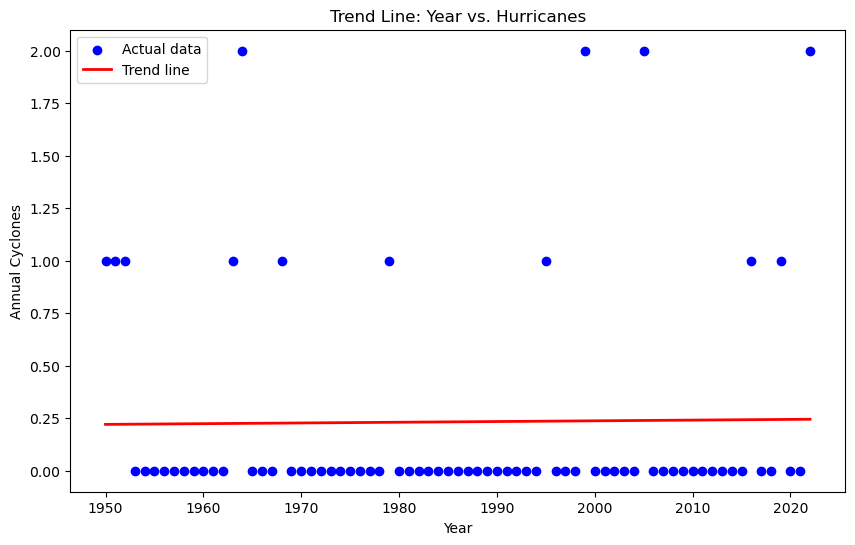

In [16]:
linear_model = LinearRegression()
linear_model2 = LinearRegression()
linear_model.fit(X, y)

# Predict values using the trained model
trend_line = linear_model.predict(X)

# Plot the data points and the trend line
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Actual data')
plt.plot(X, trend_line, color='red', linewidth=2, label='Trend line')
plt.xlabel('Year')
plt.ylabel('Annual Cyclones')
plt.title('Trend Line: Year vs. Hurricanes')
plt.legend()
plt.show()

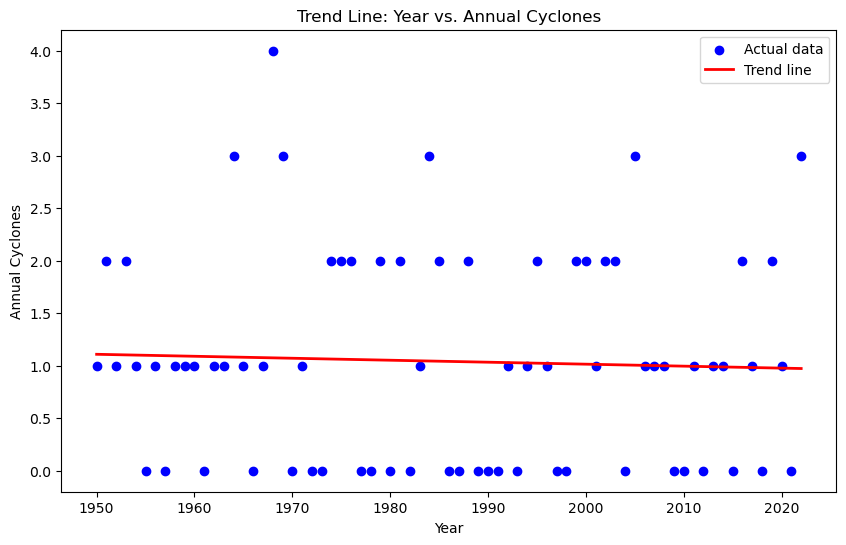

In [17]:
linear_model2.fit(X2, y2)

# Predict values using the trained model
trend_line2 = linear_model2.predict(X2)

# Plot the data points and the trend line
plt.figure(figsize=(10, 6))
plt.scatter(X2, y2, color='blue', label='Actual data')
plt.plot(X2, trend_line2, color='red', linewidth=2, label='Trend line')
plt.xlabel('Year')
plt.ylabel('Annual Cyclones')
plt.title('Trend Line: Year vs. Annual Cyclones')
plt.legend()
plt.show()

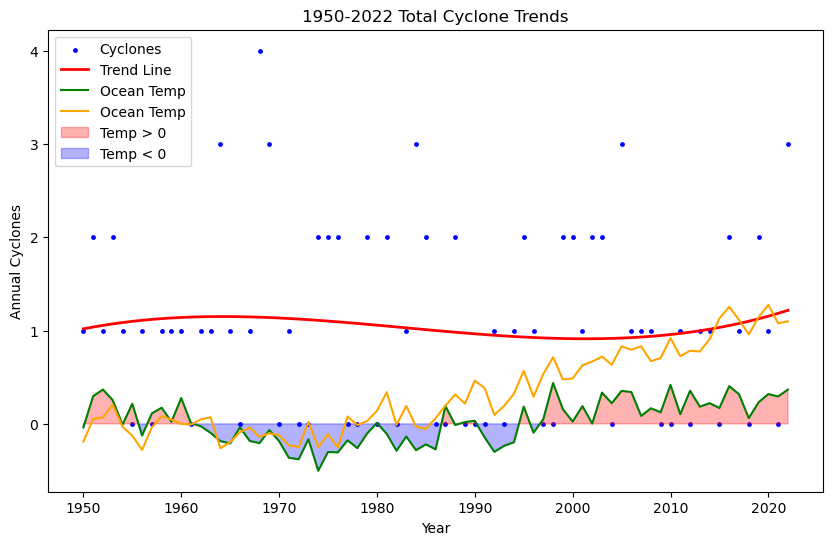

In [18]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Define the degree of the polynomial
degree = 2

# Create a pipeline that first creates polynomial features and then applies linear regression
poly_model = make_pipeline(PolynomialFeatures(3), LinearRegression())
poly_model.fit(X, y2)

# Predict values using the trained model
poly_trend_line = poly_model.predict(X)

# Plot the data points and the polynomial trend line
plt.figure(figsize=(10, 6))
plt.scatter(X, y2, s=6, c='blue', label='Cyclones')
plt.plot(X, poly_trend_line, color='red', linewidth=2, label='Trend Line')
plt.plot(X, amo_sst_short['Annual'], color='g', label='Ocean Temp')
plt.plot(X, hadcrut_short['HADCRUT_Anomaly'], color='orange', label='Ocean Temp')
plt.fill_between(x=X['Year'], y1=amo_sst_short['Annual'], where=(amo_sst_short['Annual'] > 0), interpolate=True, color='red', alpha=0.3, label='Temp > 0')
plt.fill_between(x=X['Year'], y1=amo_sst_short['Annual'], where=(amo_sst_short['Annual'] < 0), interpolate=True, color='blue', alpha=0.3, label='Temp < 0')
plt.xlabel('Year')
plt.ylabel('Annual Cyclones')
plt.title('1950-2022 Total Cyclone Trends')
plt.legend(loc='upper left')
plt.show()


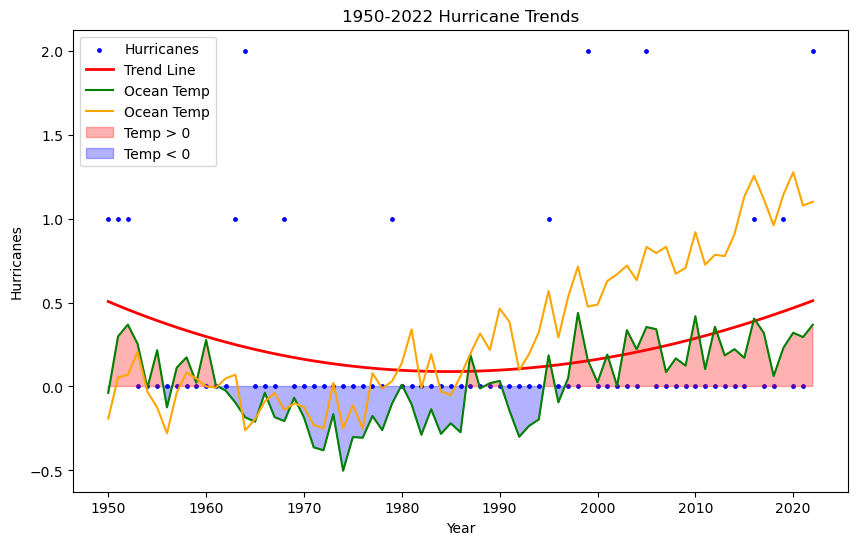

In [19]:
poly_model2 = make_pipeline(PolynomialFeatures(3), LinearRegression())
poly_model2.fit(X, y)

# Predict values using the trained model
poly_trend_line2 = poly_model2.predict(X)

# Plot the data points and the polynomial trend line
plt.figure(figsize=(10, 6))
plt.scatter(X, y, c='blue', s=6, label='Hurricanes')
plt.plot(X, poly_trend_line2, color='red', linewidth=2, label='Trend Line')
plt.plot(X, amo_sst_short['Annual'], color='g', label='Ocean Temp')
plt.plot(X, hadcrut_short['HADCRUT_Anomaly'], color='orange', label='Ocean Temp')
plt.fill_between(x=X['Year'], y1=amo_sst_short['Annual'], where=(amo_sst_short['Annual'] > 0), interpolate=True, color='red', alpha=0.3, label='Temp > 0')
plt.fill_between(x=X['Year'], y1=amo_sst_short['Annual'], where=(amo_sst_short['Annual'] < 0), interpolate=True, color='blue', alpha=0.3, label='Temp < 0')
plt.xlabel('Year')
plt.ylabel('Hurricanes')
plt.title('1950-2022 Hurricane Trends')
plt.legend(loc='upper left')
plt.show()

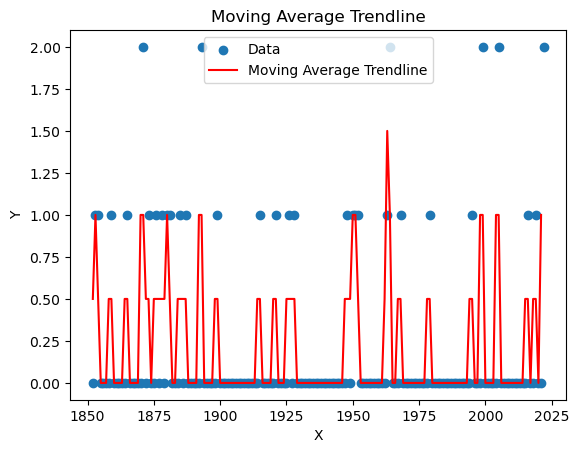

In [30]:
# Plot the data and the moving average trendline
plt.scatter(X3, y3, label='Data')
plt.plot(X3[:len(y_moving_avg)], y_moving_avg, color='red', label='Moving Average Trendline')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Moving Average Trendline')
plt.legend()
plt.show()

In [69]:
len(y_moving_avg)

167

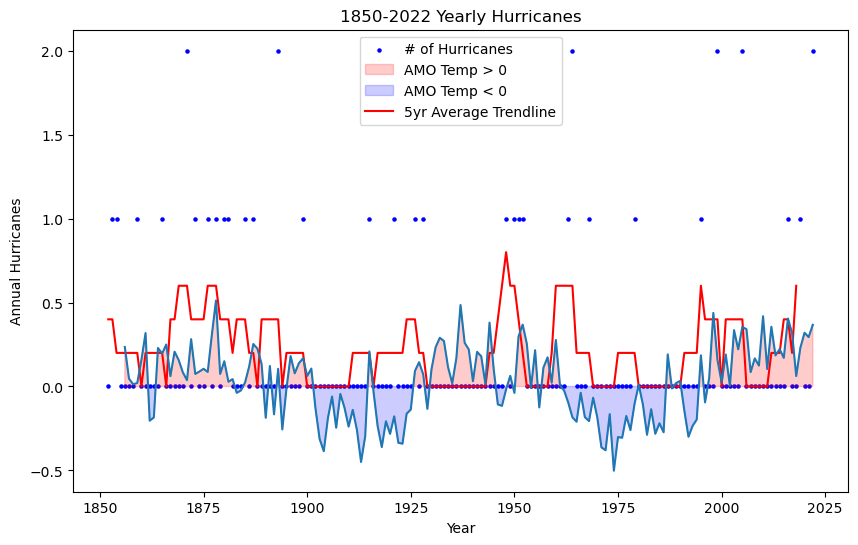

In [87]:
y_moving_avg = np.convolve(y3, np.ones(5)/5, mode='valid')

plt.figure(figsize=(10, 6))
plt.scatter(X3, y3, c='blue', s=5, label='# of Hurricanes')
plt.fill_between(x=amo_sst_long['Year'], y1=amo_sst_long['Annual'], where=(amo_sst_long['Annual'] > 0), interpolate=True, color='red', alpha=0.2, label='AMO Temp > 0')
plt.fill_between(x=amo_sst_long['Year'], y1=amo_sst_long['Annual'], where=(amo_sst_long['Annual'] < 0), interpolate=True, color='blue', alpha=0.2, label='AMO Temp < 0')
plt.plot(X3[:len(y_moving_avg)], y_moving_avg, color='red', label='5yr Average Trendline')
plt.plot(amo_sst_long['Year'], amo_sst_long['Annual'])
plt.xlabel('Year')
plt.ylabel('Annual Hurricanes')
plt.title('1850-2022 Yearly Hurricanes')
plt.legend()
plt.show()